# Week 4
## Kinnick Fox
## DSC530
All code before Excersie 3-1 is written by Allen B. Downey

In [43]:
import numpy as np

In [44]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [45]:
import thinkstats2
import thinkplot
import nsfg
import first

In [46]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [56]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')

### Exercise 3-1: 
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

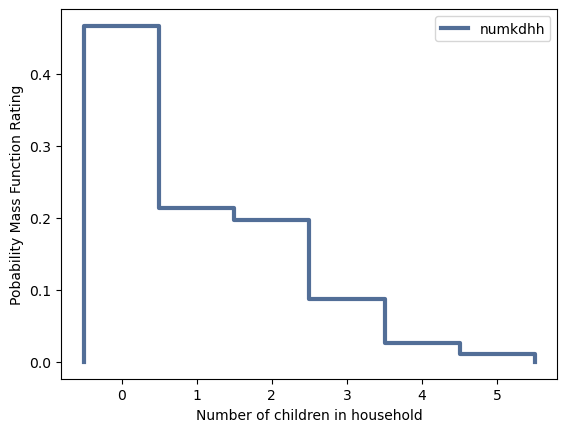

In [52]:
# store NSFG data as data
data = nsfg.ReadFemResp()
# stores PMF of number of number kids per household
child_num_prob = thinkstats2.Pmf(data.numkdhh,label="numkdhh")
thinkplot.Pmf(child_num_prob)
thinkplot.Config(xlabel="Number of children in household", ylabel="Pobability Mass Function Rating")

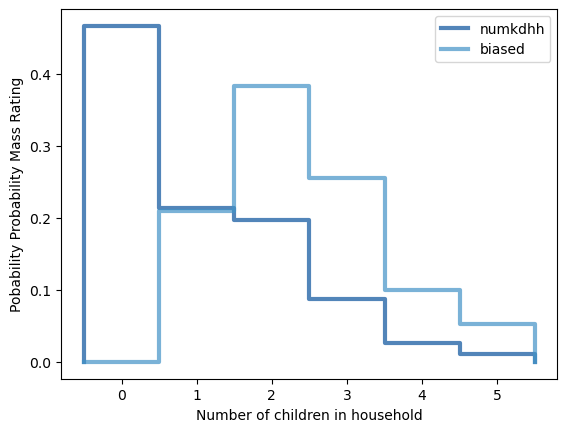

In [62]:
# generates biased version of child_num_prob
bias = BiasPmf(child_num_prob, label="biased")
# overlap biased and actual PMFs
thinkplot.PrePlot(2)
thinkplot.Pmfs([child_num_prob, bias])
thinkplot.Config(xlabel="Number of children in household", ylabel="Pobability Probability Mass Rating")

In [54]:
print("Actual Mean: {}, Biased mean: {}".format(child_num_prob.Mean(), bias.Mean()))

Actual Mean: 1.024205155043831, Biased mean: 2.403679100664282


### Exercise 3-2: 
I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap:

In [64]:
# generate data frames for live, first, and other
live, firsts, others = first.MakeFrames()
# map out live births from NSFG data
live_birth_map = nsfg.MakePregMap(live)

In [69]:
# store hist funtion output as hist 
hist = thinkstats2.Hist()
# iteratively inspect caseids for multiple live births and compare the first birth to following births
for caseid, indices in live_birth_map.items():
    if len(indices) > 1:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

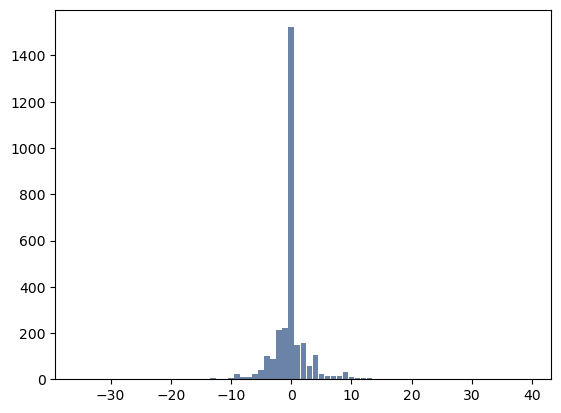

In [70]:
thinkplot.Hist(hist)

In [41]:
# find mean of histogram resaults
# outliers exist but the mean remains very close to zero
hist_pmf = thinkstats2.Pmf(hist)
hist_pmf.Mean()

-0.056367432150313125

### Exercise 4-1: 
How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [57]:
# find the percentile rank of my birthweight (8.9lbs)
# sorry mom
first_cdf.PercentileRank(8.9)

91.49667659867063

### Exercise 4-2: 
The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?

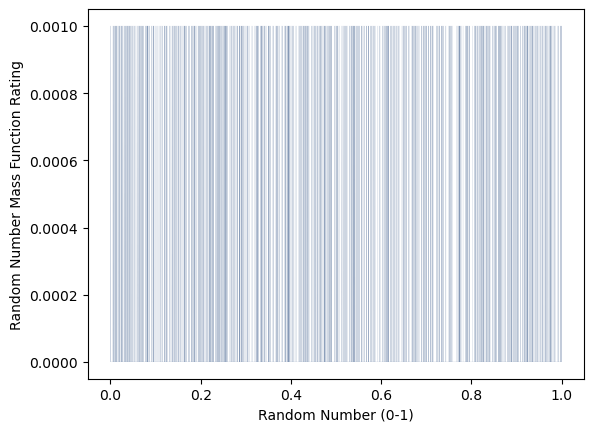

In [61]:
# generate 1000 random numbers between 0 and 1 and store them as random
random = np.random.random(1000)
# store PMF for random as random_pmf
random_pmf = thinkstats2.Pmf(random)
# plot random_pmf ensuring lines are thin enough to show different numbers
# results are not useful becuase there are too many variables and all of them have a near identical distribution.
thinkplot.Pmf(random_pmf, linewidth = 0.05)
thinkplot.Config(xlabel='Random Number (0-1)', ylabel='Random Number Probability Mass Rating')

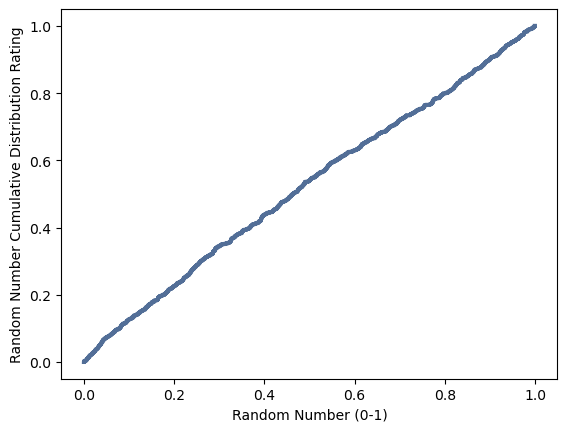

In [63]:
# store a CDF of random as random_cdf
random_cdf = thinkstats2.Cdf(random)
# plot random_cdf
# the line created from this plot is approximately straight which means it is a uniform distrobution of numbers
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel='Random Number (0-1)', ylabel='Random Number Cumulative Distribution Rating')